In [1]:
#analyzing homicide states for each state from 1980-2014
#Import libaries and data for use.  Diplay the column titles and first row for quick data exploration
import numpy as np
import pandas as pd


tp = pd.read_csv('murder.csv', iterator = True, chunksize = 1000)
dfi = pd.concat(tp, ignore_index = True)



print(len(dfi))


638454


In [2]:
#If you want to filter the data by year, just enter in the year.  
#If not then either don't run this cell or comment out
#data seems wrong, none for 2013 and only 1 for alamabama in 2014?

year = 2014
df = dfi
#df = dfi[dfi['Year'] == year]

print(df.head(3))
#print(df_state)

   Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type      ...       \
0  1980  January         1  Murder or Manslaughter      ...        
1  1980    March         1  Murder or Manslaughter      ...        
2  1980    March         2  Murder or Manslaughter      ...        

  Victim Ethnicity Perpetrator Sex  Perpetrator Age  \
0          Unknown            Male               15   
1          Unknown            Male               42   
2          Unknown         Unknown                0   

                Perpetrator Race Perpetrator Ethnicity  Relationship  \
0  Native American/Alaska Native               Unknown  Acquaintance   
1                          White               Unknow

In [3]:
#create a class to use for each state
#saves me a ton of code and confusion 
class State(object):
    def __init__(self, name):
        self.name = name
        
        df_state = df[df['State'] == self.name]
        
        solved_counter = 0
        unsolved_counter = 0
        for x in df_state['Crime Solved']:
            if x == 'Yes':
                solved_counter += 1
            elif x == 'No':
                unsolved_counter += 1
        self.solved = solved_counter
        self.unsolved = unsolved_counter
    
    def victim_race(self, race):
        #print(repr(self.race))
        df_state = df[df['State'] == self.name]
        race_counter = 0
        for x in df_state['Victim Race']:
            #print(repr(x))
            if str(x) == str(race):
                race_counter +=1
      
        self.victim_race = race_counter
       
    
    def weapons_used(self):
        df_state = df[df['State'] == self.name]
        weapons = {}
        for x in df_state['Weapon']:
            if x in weapons:
                weapons[x] +=1
            else:
                weapons[x] = 1
        self.weapons = weapons
      
    def victim_age_range(self, vic_age_min, vic_age_max):
        df_state = df[df['State'] == self.name]
        vic_age_counter = 0
        for x in df_state['Victim Age']:
            if int(x) >= vic_age_min and int(x) <= vic_age_max:
                vic_age_counter +=1
        self.victim_age_range = vic_age_counter

    def perpetrator_race(self, race):
        #print(repr(self.race))
        df_state = df[df['State'] == self.name]
        per_race_counter = 0
        for x in df_state['Perpetrator Race']:
            #print(repr(x))
            if str(x) == str(race):
                per_race_counter +=1
      
        self.perpetrator_race = per_race_counter

    def perpetrator_age_range(self, per_age_min, per_age_max):
        df_state = df[df['State'] == self.name]
        per_age_counter = 0
        for x in df_state['Perpetrator Age']:
            if int(x) >= per_age_min and int(x) <= per_age_max:
                per_age_counter +=1
        self.perpetrator_age_range = per_age_counter
print('complete')

complete


In [4]:
virginia = State('Virginia')
print(virginia.solved)
print(virginia.unsolved)
virginia.victim_race('Black')
print(virginia.victim_race)
virginia.weapons_used()
print(virginia.weapons)
virginia.victim_age_range(18,21)
print(virginia.victim_age_range)
virginia.perpetrator_age_range(18,21)
print(virginia.perpetrator_age_range)

12217
3303
9001
{'Drugs': 64, 'Fall': 4, 'Strangulation': 147, 'Firearm': 1938, 'Blunt Object': 1334, 'Handgun': 7101, 'Fire': 131, 'Unknown': 1019, 'Drowning': 25, 'Knife': 2102, 'Rifle': 536, 'Shotgun': 931, 'Suffocation': 114, 'Gun': 61, 'Explosives': 3, 'Poison': 10}
2037
2341


[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014]
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'Nebraska' 'North Carolina'
 'North Dakota' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada'
 'New York' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhodes Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Vermont' 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming']
51


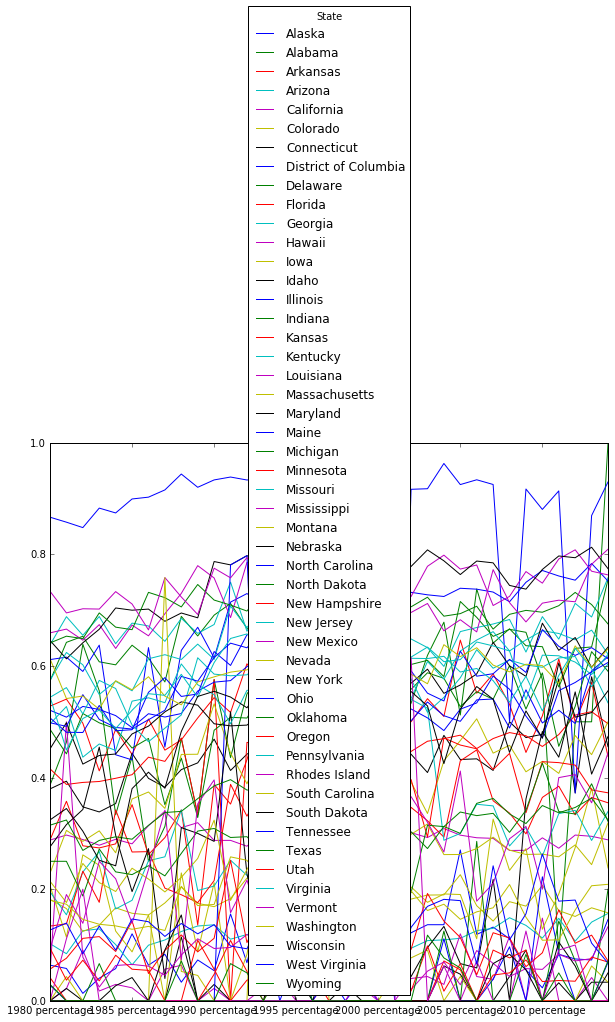

In [5]:
#states = ['Virginia', 'Texas', 'Florida', 'New York', 'Alabama']
states = dfi.State.unique()
years = dfi.Year.unique()
print(years)
print(states)
print(len(states))
black_percentage = {}
df_test = pd.DataFrame()
df_test['State'] = states

for n in years:
    df = dfi[dfi['Year'] == n]
    percentage = []
    for x in states:
        s = State(x)
        s.victim_race('Black')
        try:
            p = s.victim_race/(s.solved + s.unsolved)
        except:
            pass
        black_percentage[str(x)] = float(p)
        percentage.append(p)
    df_test[str(n) + ' percentage'] = percentage
#df_test['Percentage'] = percentages
#print(black_percentage)


#print(df_test)

    
%matplotlib inline
import matplotlib.pyplot as plt


df_plot = df_test.set_index('State').T
df_plot.plot(kind = 'line', figsize = (10,10))
plt.show()

  states  2000  2001  2002
0     va   0.1   0.5   0.0
1     tx   0.2   0.4   0.5
2     fl   0.3   0.3   1.0
states   va   tx   fl
2000    0.1  0.2  0.3
2001    0.5  0.4  0.3
2002    0.0  0.5  1.0


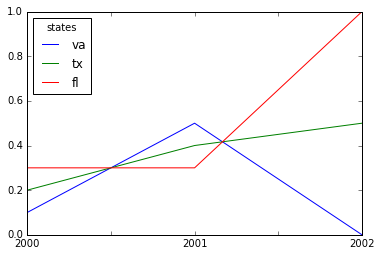

In [6]:
test = pd.DataFrame()
states = ['va','tx','fl']
k1 = [0.1,0.2,0.3]
k2 = [0.5,0.4,0.3]
k3 = [0.0,0.5,1.0]
test['states'] = states
test['2000'] = k1
test['2001'] = k2
test['2002'] = k3
print(test)
%matplotlib inline
test2 = test.set_index('states').T
print(test2)

test2.plot()

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014]
['Native American/Alaska Native' 'White' 'Black' 'Unknown'
 'Asian/Pacific Islander']
5


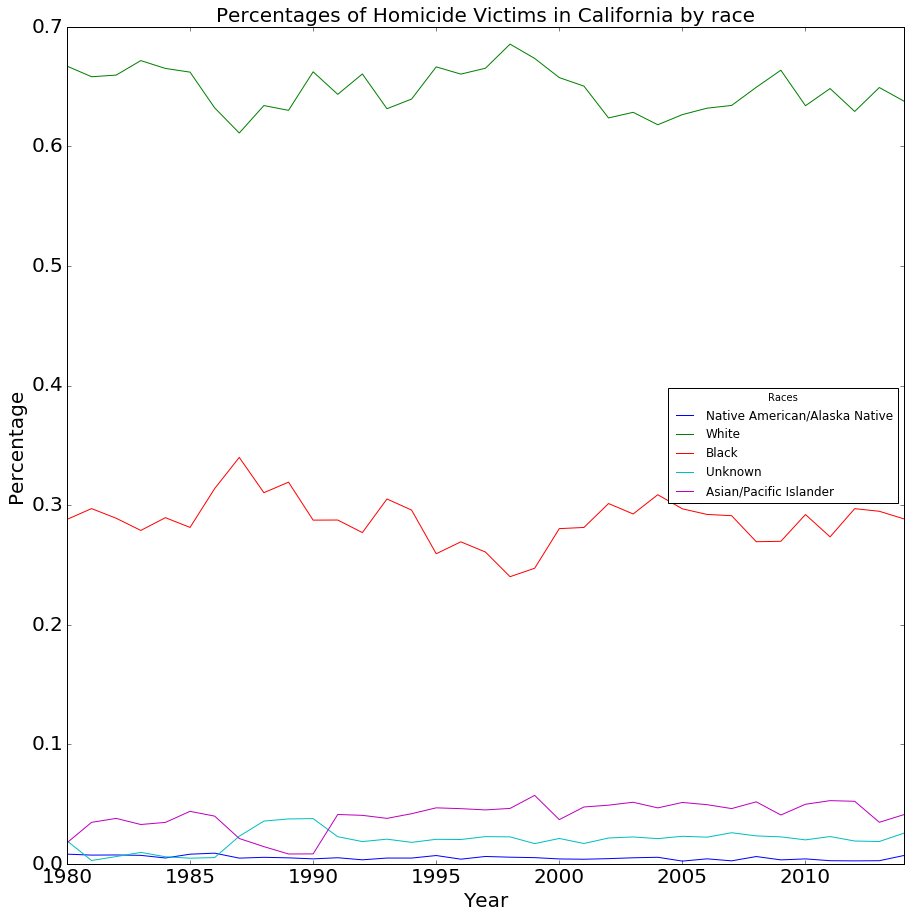

In [7]:
#states = ['Virginia', 'Texas', 'Florida', 'New York', 'Alabama']
races = pd.unique(dfi['Victim Race'])
years = dfi.Year.unique()
print(years)
print(races)
print(len(races))
black_percentage = {}
df_test = pd.DataFrame()
df_test['Races'] = races
test_state = 'California'

for n in years:
    df = dfi[dfi['Year'] == n]
    percentage = []
    for x in races:
        s = State(test_state)
        s.victim_race(x)
        try:
            p = s.victim_race/(s.solved + s.unsolved)
        except:
            pass
        black_percentage[str(x)] = float(p)
        percentage.append(p)
    df_test[str(n)] = percentage
#df_test['Percentage'] = percentages
#print(black_percentage)


#print(df_test)
df_plot = df_test.set_index('Races').T
df_plot.plot(kind = 'line', figsize = (15,15), fontsize = 20)
plt.title('Percentages of Homicide Victims in ' + test_state + ' by race', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.show()

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014]
['Native American/Alaska Native' 'White' 'Black' 'Unknown'
 'Asian/Pacific Islander']
5


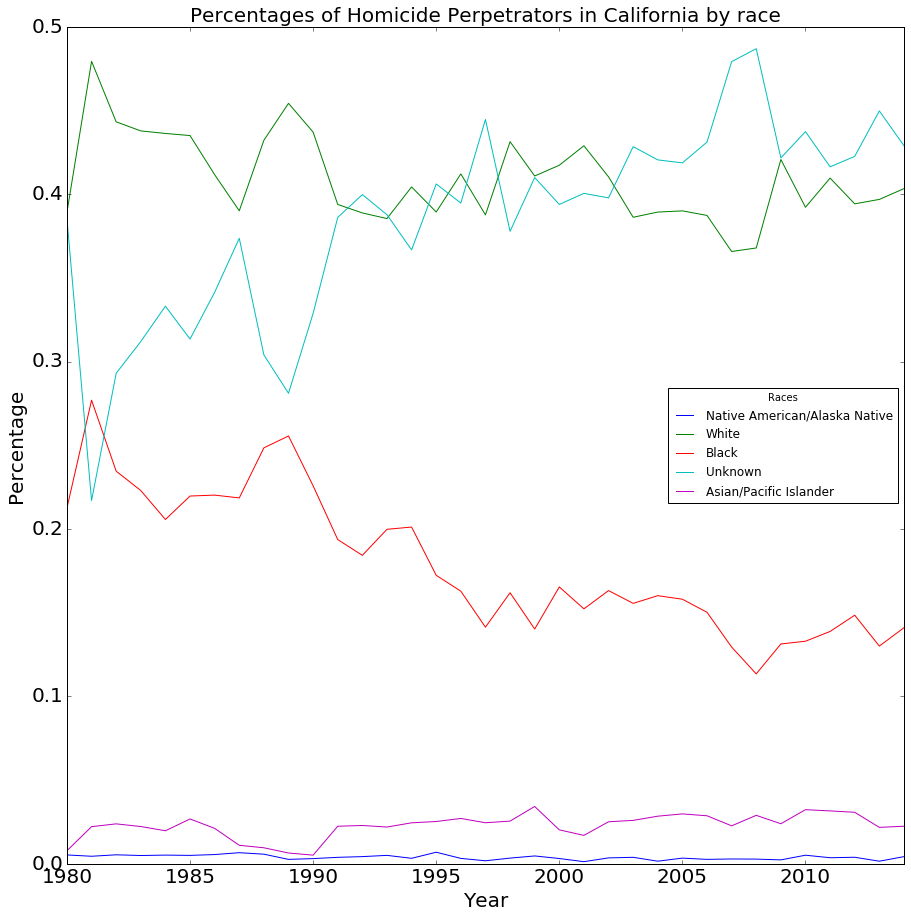

In [8]:
#states = ['Virginia', 'Texas', 'Florida', 'New York', 'Alabama']
#races = pd.unique(dfi['Perpetrator Race'])
years = dfi.Year.unique()
print(years)
print(races)
print(len(races))
black_percentage = {}
df_test = pd.DataFrame()
df_test['Races'] = races
#test_state = 'Texas'

for n in years:
    df = dfi[dfi['Year'] == n]
    percentage = []
    for x in races:
        s = State(test_state)
        s.perpetrator_race(x)
        try:
            p = s.perpetrator_race/(s.solved + s.unsolved)
        except:
            pass
        black_percentage[str(x)] = float(p)
        percentage.append(p)
    df_test[str(n)] = percentage
#df_test['Percentage'] = percentages
#print(black_percentage)


#print(df_test)
df_plot = df_test.set_index('Races').T
df_plot.plot(kind = 'line', figsize = (15,15), fontsize = 20)
plt.title('Percentages of Homicide Perpetrators in ' + test_state + ' by race', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.show()